<a href="https://colab.research.google.com/github/apriliadinir/top10_netflix_visualization/blob/main/Top10Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Analysis on Netflix Daily Top 10


Objective of this code is to get a better undertanding from the dataset using exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [8]:
df_netflix = pd.read_csv(filepath_or_buffer = 'netflix daily top 10.csv')

In [3]:
df_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [4]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


# Data Preprocessing

In [10]:
df_netflix['Year to Date Rank'] = df_netflix['Year to Date Rank'].replace('-',0)
df_netflix['Last Week Rank'] = df_netflix['Last Week Rank'].replace('-',0)

In [11]:
df_netflix['As of']=pd.to_datetime(df_netflix['As of'])
df_netflix['Year to Date Rank'] = df_netflix['Year to Date Rank'].astype('int')
df_netflix['Last Week Rank'] = df_netflix['Last Week Rank'].astype('int')
df_netflix['Netflix Release Date'] = pd.to_datetime(df_netflix['Netflix Release Date'])

## Handle Missing Value

In [12]:
df_netflix.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [13]:
df_netflix['Netflix Exclusive'].describe()

count     4599
unique       1
top        Yes
freq      4599
Name: Netflix Exclusive, dtype: object

In [14]:
df_netflix['Netflix Exclusive']= df_netflix['Netflix Exclusive'].fillna('No')
df_netflix['Netflix Exclusive'].value_counts()

Yes    4599
No     2501
Name: Netflix Exclusive, dtype: int64

# EDA

find the correlation score within each coloumns

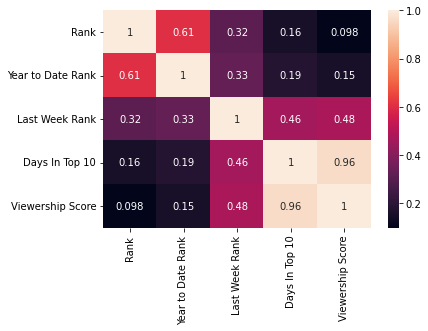

In [15]:
corrMatrix = df_netflix.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

from the correlation matrix, we can see there is a correlation between Days In Top 10 and Viewership score (0.96 point)

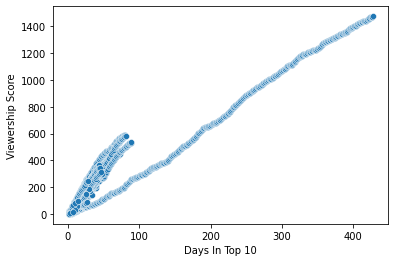

In [16]:
# verifying with scatter plot 

sns.scatterplot(data = df_netflix, x=df_netflix['Days In Top 10'], y=df_netflix['Viewership Score'])

there is a positive correlation between Days In Top 10 and Viewership Score, meaning the longer a show can be on the top 10 list, the higher its viewership score

## See which genre has performed best

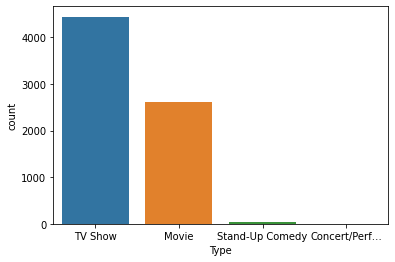

In [17]:
sns.countplot(data = df_netflix, x=df_netflix['Type'])

## Get to know what TV shows title dominate the Days in top 10

In [18]:
TV = df_netflix[df_netflix['Type']=='TV Show']
TV_top = TV.groupby('Title')['Days In Top 10'].max().sort_values(ascending = False)
TV_top.head(15)

Title
Cocomelon               428
Ozark                    89
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             66
Bridgerton               58
Lucifer                  57
Virgin River             55
Maid                     49
Too Hot to Handle        48
Emily in Paris           48
Love is Blind            46
Name: Days In Top 10, dtype: int64

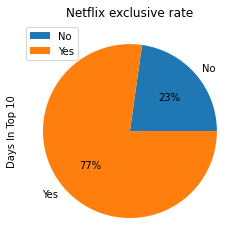

In [19]:
#analyze the top 100 shows if Netflix exclusive shows performs better than non netflix exclusive shows

TV_top2 = TV.groupby('Title').max()
TV_top3 = TV_top2.sort_values(by = 'Days In Top 10', ascending = False)[:101]
TV_100 = TV_top3.groupby('Netflix Exclusive').count().plot(kind = 'pie', y = 'Days In Top 10', autopct = '%1.0f%%', title = 'Netflix exclusive rate')

Netflix Exclusive performs better in top 100 TV shows

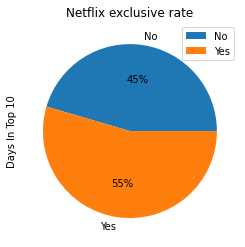

In [20]:
#analyze the top 10 shows if Netflix exclusive shows performs better than non netflix exclusive shows

TV_top4= TV_top2.sort_values(by = 'Days In Top 10', ascending = False)[:11]
TV_10 = TV_top4.groupby('Netflix Exclusive').count().plot(kind = 'pie', y = 'Days In Top 10', autopct = '%1.0f%%', title = 'Netflix exclusive rate')

Netflix Exclusive performs better in Top 10 TV Shows

## Get to know what Movie title dominate the Days in top 10

In [21]:
movie = df_netflix[df_netflix['Type']=='Movie']
movie_top = movie.groupby('Title')['Days In Top 10'].max().sort_values(ascending = False)
movie_top.head(15)

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
Donât Look Up                   26
The Christmas Chronicles 2        24
Illumination Presents The G…      24
We Can Be Heroes                  24
Red Notice                        23
The Unforgivable                  22
Home                              21
Wish Dragon                       21
Back to the Outback               20
Just Go With It                   19
Name: Days In Top 10, dtype: int64

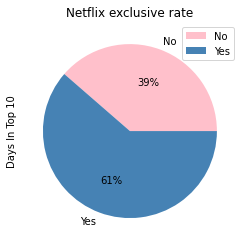

In [22]:
#analyze the top 100 shows if Netflix exclusive shows performs better than non netflix exclusive shows

colors = ['pink', 'steelblue']
movie_top2 = movie.groupby('Title').max()
movie_top3 = movie_top2.sort_values(by = 'Days In Top 10', ascending = False)[:101]
movie_100 = movie_top3.groupby('Netflix Exclusive').count().plot(kind = 'pie', y = 'Days In Top 10', autopct = '%1.0f%%', title = 'Netflix exclusive rate', colors = colors )

Netflix Exclusive performs better in Top 100 TV Shows

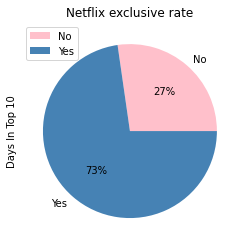

In [23]:
#analyze the top 10 shows if Netflix exclusive shows performs better than non netflix exclusive shows

colors = ['pink', 'steelblue']

movie_top4 = movie_top2.sort_values(by = 'Days In Top 10', ascending = False)[:11]
movie_100 = movie_top4.groupby('Netflix Exclusive').count().plot(kind = 'pie', y = 'Days In Top 10', autopct = '%1.0f%%', title = 'Netflix exclusive rate', colors = colors )

Netflix Exclusive performs better in Top 100 TV Shows

## Get to know what stand up comedy title dominate the days in top 10

In [24]:
#analyze the top 15 shows if Netflix exclusive shows performs better than non netflix exclusive shows

su = df_netflix[df_netflix['Type']=='Stand-Up Comedy']
su_top = su.groupby('Title')['Days In Top 10'].max().sort_values(ascending = False)
su_top.head(15)

Title
Dave Chappelle: The Closer        16
Kevin Hart: Zero F**ks Given      10
George Lopez: Weâll Do It f…     5
Jerry Seinfeld: 23 Hours to…       5
Chris DâElia: No Pain            3
Bo Burnham: Inside                 2
Name: Days In Top 10, dtype: int64

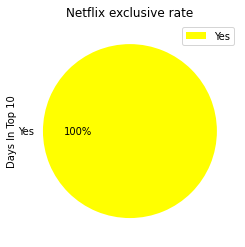

In [25]:
#analyze the top 100 shows if Netflix exclusive shows performs better than non netflix exclusive shows

colors = ['Yellow', 'Magenta']
su_top2 = su.groupby('Title').max()
su_top3 = su_top2.sort_values(by = 'Days In Top 10', ascending = False)[:101]
su_100 = su_top3.groupby('Netflix Exclusive').count().plot(kind = 'pie', y = 'Days In Top 10', autopct = '%1.0f%%', title = 'Netflix exclusive rate', colors = colors)

In [26]:
su_100 = su_top3.groupby('Netflix Exclusive').count()
su_100

,As of,Rank,Year to Date Rank,Last Week Rank,Type,Netflix Release Date,Days In Top 10,Viewership Score
Netflix Exclusive,,,,,,,,
Yes,6,6,6,6,6,6,6,6


there is no non netflix exclusive in stand-up comedy

# Conclusion

1. TV shows have a better chance of staying in the Top 10 than movie or stand-up comedy or concerts, since it takes longer to watch a season of a TV show
2. There is a high positive correlation (score 0.96) between Days In Top 10 and Viewership Score, meaning the longer a show can be on the top 10 list, the higher its viewership score
3. Netflix exclusive performs best in TV Shows category and Movie category
4. There is no non netflix exclusive in stand-up comedy category